## Exploratory Data Analysis

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

amd_df = pd.read_csv("./data/AMD.csv",parse_dates=["Date"],index_col="Date")
print(amd_df.info())
print(amd_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8843 entries, 1983-03-21 to 2018-04-16
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Adj_Close   8843 non-null   float64
 1   Adj_Volume  8843 non-null   float64
dtypes: float64(2)
memory usage: 207.3 KB
None
            Adj_Close  Adj_Volume
Date                             
1983-03-21   8.997535    510800.0
1983-03-22   8.497672    328000.0
1983-03-23   8.717612    427200.0
1983-03-24   8.780094    393200.0
1983-03-25   8.872569    210400.0


<AxesSubplot:xlabel='Date'>

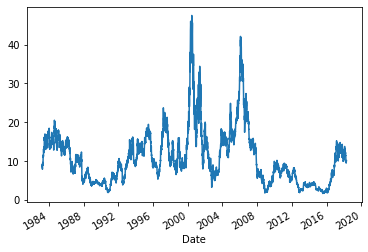

In [24]:
# Adj_Close shows (adjusted) closing stock prices 
amd_df["Adj_Close"].plot()

<AxesSubplot:ylabel='Frequency'>

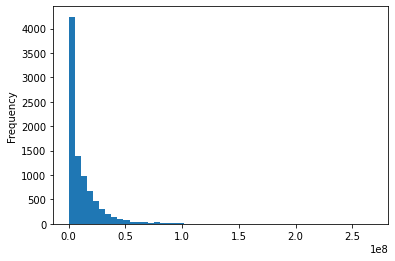

In [25]:
vol = amd_df["Adj_Volume"]
vol.plot.hist(bins=50)

We can use machine learning in many ways - we can predict the raw prices of stocks, but typically we predict percentage changes. This makes it easier to interpret the results as well as make gneeral purpose models for the data.

To get the percentage changes use the `.pct_change()` methods:

<AxesSubplot:ylabel='Frequency'>

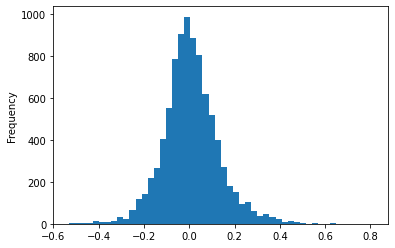

In [26]:
amd_df['10d_close_pct'] = amd_df["Adj_Close"].pct_change(10)
amd_df['10d_close_pct'].plot.hist(bins = 50)

Typically, for stocks, percentage changes are right-skewed normally distributed.

Another tool is the `.shift()` - shifts the index by given amount. creates a new column with the closing price from 10days in future. We can get the price percentage change 10 days in the future:

In [27]:
amd_df['10d_future_close'] = amd_df["Adj_Close"].shift(-10)
amd_df['10d_future_close_pct'] = amd_df["10d_future_close"]

We can also look at any correlations: using the `.corr` method - however this is not very accurate/reliable. Another option is to look at the scatter plot.

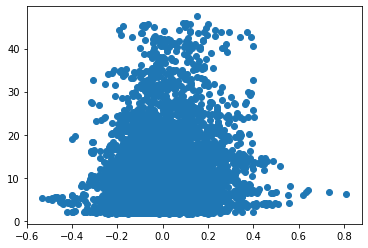

In [34]:
plt.scatter(amd_df['10d_close_pct'], amd_df["10d_future_close_pct"])
plt.show()

## Identifying features and targets

To apply machine learning methods - we need featuers and targets. In this setting, features are the inputs we need to predict future price changes - in this case this is the 10-day price change and volume. The targets are the future price changes -- since this is what we want to predict.

Other usefull features to incorporate are historical data - e.g. the moving average. The moving average is useful as it allows us to concentrate past data into a single point.

Another indicated that is useful is the relative strength index, or RSI. RSI clos to - means price is due to rebound from recent lows, RSI close to 100 may mean prices of the stock is due to decline.

The eq for RSI is :

$$ 100-\frac{100}{1+\text{RS}}$$

here, RS - relative strength is given by 

$$\text{RS} = \frac{\text{Average gain over n periods}}{\text{Average loss over n periods}}$$

is the average gain of price increases divided by the average loss of price decreases during the time prediod, $n$.

In [42]:
import talib

# Must provide numpy arrays not pandas series / df
amd_df['ma200']= talib.SMA(amd_df['Adj_Close'].values, timeperiod = 200)
amd_df['rsi200'] = talib.RSI(amd_df['Adj_Close'].values, timeperiod = 200)


# Features:

feature_names = ['10d_close_pct', 'ma200', 'rsi200']
features = amd_df[feature_names]
targets = amd_df['10d_future_close_pct']

feature_target_df = amd_df[feature_names + ['10d_future_close_pct']]

## Linear modelling

 We want to split data into train and test sets - but can't use sklearns train_test_split as it randomly shuffles the train test data. In this context, we want to use earler (in terms of date) as the training data and the more recent prices as the test set.
 
 